#### Вступление

**Перед нами стоит задача: проанализировать базу данных по компьютерным играм, чтобы сделать прогноз на 2017-й год. Наш проект — интернет-магазин компьютерных игр, который работает по всему миру.**

In [285]:
# импортируем необходимые для работы библиотеки

import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Загрузка данных

In [286]:
data = pd.read_csv('/datasets/games.csv') # откроем нашу базу данных и сохраним в дата
data.sample(5) # посмотрим случайный фрагмент датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3243,Guitar Hero: Metallica,PS3,2009.0,Misc,0.28,0.24,0.00,0.10,86.0,8,T
10980,Metal Slug X,PS,2001.0,Shooter,0.05,0.03,0.00,0.01,85.0,8.8,T
8381,VR Golf '97,PS,1996.0,Sports,0.09,0.06,0.00,0.01,NaN,NaN,NaN
8355,Catwoman,PS2,2004.0,Action,0.08,0.06,0.00,0.02,46.0,6.9,T
3701,Dragon Ball Z: Shin Budokai,PSP,2006.0,Fighting,0.26,0.08,0.13,0.07,70.0,8.1,T


In [287]:
data.info() # посмотрим на число и тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [288]:
data.describe(include='all') # посмотрим статистические характеристики столбцов данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


### Подготовка данных

#### Перевод в нижний регистр

In [289]:
# приведём названия столбцов к нижнему регистру
data.columns = [x.lower() for x in data.columns]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


#### Замена типов данных и устранение пропусков

Посмотрим на типы данных. Нужно заменить: **year_of_release** (дробное число вместо даты), **user_score** (строка вместо дроби). Для удобства обработки данных заодно заменим пропуски.

In [290]:
# на всякий случай удалим явные дубли
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [291]:
# поищем неполные дубликаты
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [292]:
# у нас две одинаковые игры, отбросим дубли
data = data.drop (index=[16230, 14244])

In [293]:
# запустим проверку ещё раз
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [294]:
# поищем неявные дубликаты в рейтингах
data['rating'].value_counts()

E       3989
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [295]:
# у нас есть редкие рейтинги, которые можно объединить с другими / заменить

data.loc[data['rating'] == "EC", "rating"] = "E" # EC - для детей младшего возраста, заменим на "для всех"
data.loc[data['rating'] == "K-A", "rating"] = "E" # K-A - kids to adults, тоже меняем на "для всех"
data.loc[data['rating'] == "AO", "rating"] = "M" # adults only - заменим на М, для взрослых
data.loc[data['rating'] == "RP", "rating"] = "M" # рейтинг ожидается, но близок к М, заменяем

In [296]:
# посмотрим результат
data['rating'].value_counts()

E       4000
T       2961
M       1567
E10+    1420
Name: rating, dtype: int64

In [297]:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [298]:
# отбросим 2 пропуска в жанре, названии и годах
data.dropna(subset=['genre', 'name', 'year_of_release'], inplace=True)

# пропуски в оценках оставим так
# их слишком много и они не критичны

In [299]:
# проверим число пропусков
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [300]:
# переведём столбец в формат даты, пропущенные значения переведём в NaT
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y', errors='coerce')

In [301]:
# оставим в столбце только год
data['year_of_release'] = data['year_of_release'].dt.year
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [302]:
data['user_score'].value_counts().head()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

У нас много оценок tbd - to be decided, неопределённых. Их нельзя заменить медианой или средним, но можно поставить заглушку для удобства обработки. 

In [303]:
# с практической точки зрения tbd — это NaN, заменим
data.loc[data['user_score'] == "tbd", "user_score"] = np.nan

In [304]:
# заменим пропуски на NaN (отсутствующие значения, пригодные для обработки)
data['critic_score'] = data['critic_score'].fillna(np.nan)
data['user_score'] = data['user_score'].fillna(np.nan)

In [305]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропущенных значений в оценках стало больше, но в целом там стало больше порядка. Нет путаницы с tbd и значениями-заглушками.

In [306]:
data['rating'] = data['rating'].fillna('NR')

In [307]:
data['user_score'] = data['user_score'].astype(float)

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Откуда взялись пропуски?**

**Скорее всего, некоторые игры просто не оценены: какие-то выпущены до появления рейтинга, какие-то вышли совсем недавно и ещё не успели заработать оценку. Что касается рейтинга, то он американский, на японском рынке есть свой рейнтинг. Также пропуски были в году релиза — возможно это необязательное поле, которое не заполняют, либо игра слишком старая и информация не сохранилась.**

#### Столбец суммарных продаж

In [309]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# суммарные продажи во всех регионах запишем в отдельный столбец
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


**Вывод: мы открыли базу данных и подготовили её к работе. Выяснили, что в данных много пропусков в оценках и рейтинге, встречаются единичные случаи пропусков в названии, жанре, плюс достаточно часто не проставлены годы выпуска. Также мы удалили дублирующуюся информацию и посчитали суммарные продажи по всем регионам.**

In [310]:
data.query('name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NR,5.07


In [311]:
data[data['name'].str.lower().str.contains('super mario bros')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NR,17.28
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
98,Super Mario Bros. 2,NES,1988,Platform,5.39,1.18,0.70,0.19,NaN,NaN,NR,7.46
185,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84.0,8.1,E,5.23
187,Super Mario Bros. 3,GBA,2003,Platform,2.93,1.25,0.83,0.20,NaN,NaN,NR,5.21
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NR,5.07
574,Super Mario Bros.: The Lost Levels,NES,1986,Platform,0.00,0.00,2.65,0.00,NaN,NaN,NR,2.65


### Исследовательский анализ данных

#### Число игр по годам

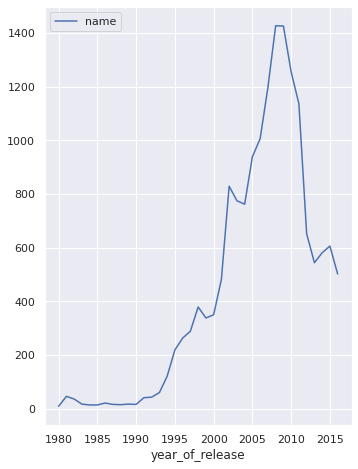

In [312]:
# посмотрим, сколько игр выпускалось в разные годы
data.pivot_table(values='name', index='year_of_release', aggfunc='count').plot(grid=True);

In [313]:
# посмотрим, в какие годы было меньше всего игр
data.pivot_table(values='name', index='year_of_release', aggfunc='count').sort_values('name', ascending=False).tail(15)

,name
year_of_release,
1994,121
1993,60
1981,46
1992,43
1991,41
1982,36
1986,21
1989,17
1983,17


In [314]:
# до 1994 года игр выходило очень мало, эти данные можно смело отбросить
data = data.query('year_of_release >= 1994')

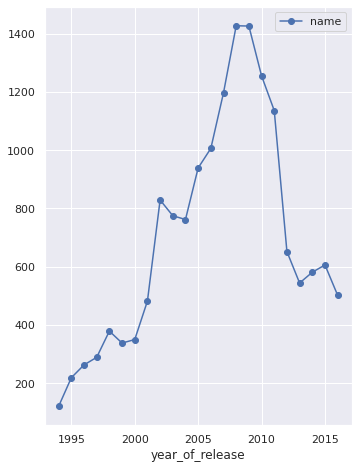

In [315]:
# посмотрим на обновлённый график
data.pivot_table(values='name', index='year_of_release', aggfunc='count').plot(style='-o', grid=True);

#### Продажи по платформам

In [316]:
# посмотрим топ-10 платформ по объёму продаж
top_platform = data.groupby(['platform']).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False).head(10)
top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


При этом с большим отрывом выделяются 6 платформ: PS2, X360, PS3, Wii, DS, PS. Посмотрим, как в какие годы выходили игры на них и как с годами менялась ситуация.

In [317]:
top_platform_names = top_platform.index
top_platform_names

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

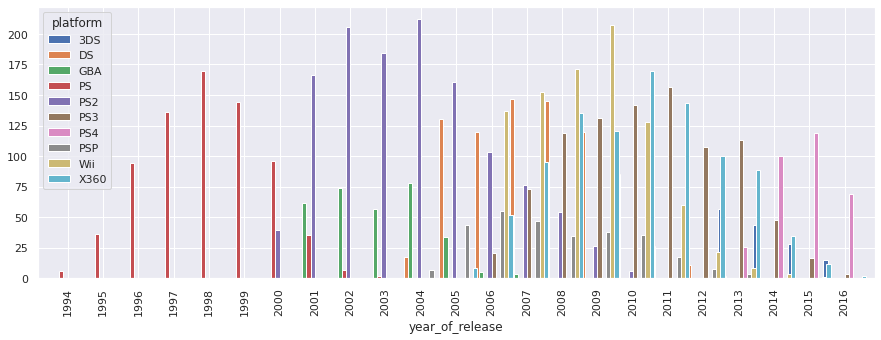

In [318]:
# посмотрим уровень продаж платформ по годам
data[data['platform'].isin(top_platform_names)]\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(15,5), width=1.2);

**PS**

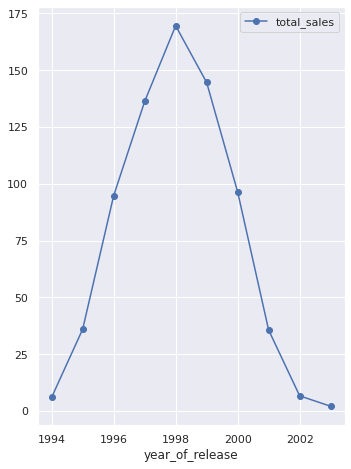

In [319]:
data.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(style='-o', grid=True);

In [320]:
data.query('platform == "PS"')['year_of_release'].max() + 1 - data.query('platform == "PS"')['year_of_release'].min()

10

Платформа PS существовала 10 лет (на самом деле может и больше, поскольку мы срезали хвост до 1994 года). При этом на пике она была 3 года: с 1997 по 1999 год. Можно сказать, что 5 лет она росла, и ещё 5 лет падала.

**PS2**

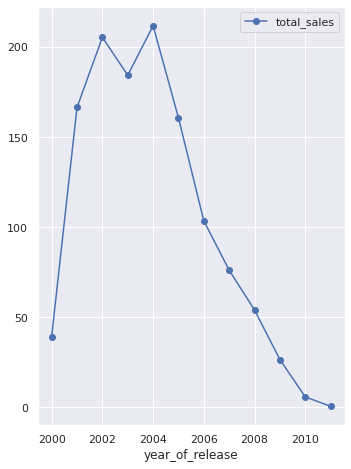

In [321]:
data.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(style='-o', grid=True);

In [322]:
data.query('platform == "PS2"')['year_of_release'].max() + 1 - data.query('platform == "PS2"')['year_of_release'].min()

12

Платформа PS2 существовала 12 лет — с 2000 по 2011 год. При этом на пике она была 5 лет: после 3 лет пиковой активности (2002-2004 год) начался период резкого спада.
Здесь видно, что фактически PS2 стала причиной резкого падения популярности платформы PS — люди просто перешли на более свежую версию.

**PS3**

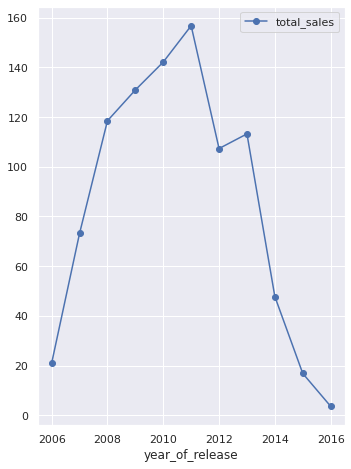

In [323]:
data.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(style='-o', grid=True);

In [324]:
data.query('platform == "PS3"')['year_of_release'].max() + 1 - data.query('platform == "PS3"')['year_of_release'].min()

11

Платформа PS3 существовала 11 лет — с 2006 по 2016 год. При этом на пике она была 3-5 лет: примерно с 2008 по 2013 год. Резкое падение началось после 2013 года.

**DS**

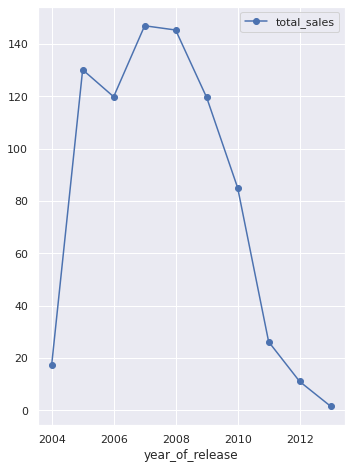

In [325]:
data.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(style='-o', grid=True);

In [326]:
data.query('platform == "DS"')['year_of_release'].max() + 1 - data.query('platform == "DS"')['year_of_release'].min()

10

Платформа DS была на пике 5 лет: с 2005 по 2009 год и существовала 10 лет. Судя по годам, конкурировала с PS2 (возможно именно она поспособствовала её резкому спаду) и PS3 (она в этот момент только набирала популярность).

**X360**

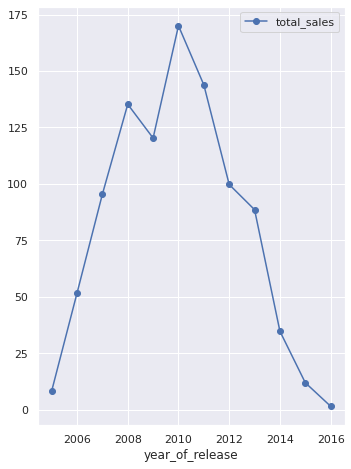

In [327]:
data.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(style='-o', grid=True);

In [328]:
data.query('platform == "X360"')['year_of_release'].max() + 1 - data.query('platform == "X360"')['year_of_release'].min()

12

Платформа X360 продержалась 12 лет: c 2005 по 2016 год. На пике она была с 2008 по 2011 год. Активно конкурировала с PS3.

**Wii**

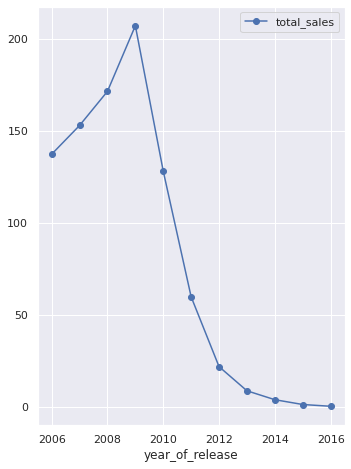

In [329]:
data.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(style='-o', grid=True);

In [330]:
data.query('platform == "Wii"')['year_of_release'].max() + 1 - data.query('platform == "Wii"')['year_of_release'].min()

11

Платформа Wii просуществовала 11 лет: с 2006 по 2016 год. На пике была недолго, буквально 2 года, после 2009 года произошло резкое падение. Играла на рынке одновременно с PS3, DS, X360.

**Вывод: в среднем платформы существуют на рынке 10-12 лет, при этом на пике они бывают 2-5 лет, не больше. Кроме того, мы видим, что 2012 год был тяжёлым для игровой индустрии ("докатился" кризис 2008-2009 года, плюс 2012 год был признан самым тяжёлым для розничных продаж). Таким образом, сделаем вывод, что анализировать индустрию стоит максимум за 4 последних года, избегая 2012 год, когда рынки трясло.**

#### Отбор актуальных данных

Перед нами стоит задача — построить прогноз на 2017 год. Возьмём 4 года, с 2013 по 2016 годы. Этого срока достаточно для анализа платформ (соответствует их жизненному циклу), плюс мы не задеваем переломный 2012 год, который бессмысленно брать для анализа.
Отбросим данные за прошлые периоды.

In [331]:
data = data.query('year_of_release > 2012')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


#### Оценка платформ: лидеры, растущие, падающие

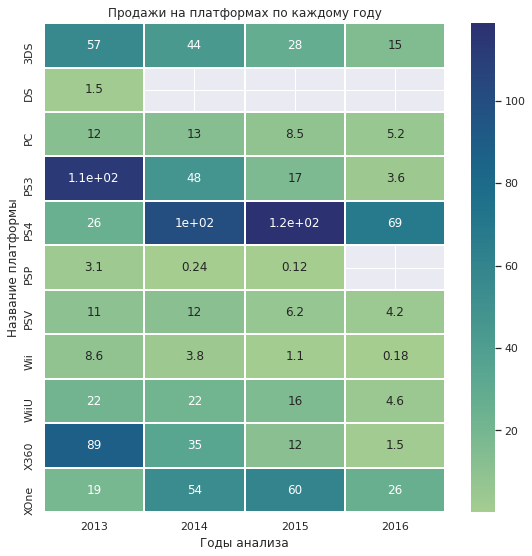

In [332]:
plt.figure(figsize=(9,9))
plt.title('Продажи на платформах по каждому году')

(sns.heatmap(data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')\
             , annot=True, cmap="crest",linewidths=1))
plt.ylabel('Название платформы')
plt.xlabel('Годы анализа')
plt.grid(True);

* **Лидирующие платформы:** PS4, XOne. Даже с учётом просадки рынка они удерживают уровень продаж.

* **Потенциально прибыльные платформы:** неоднозначные позиции у WiiU (держался на одном уровне, потом упал вместе с рынком), PC и PSV (в 2014 году выросли, затем медленное падение вместе с рынком). Также сюда отнесём и лидирующие PS4 и XOne — они тоже могут потенциально показать прибыль в следующем периоде, ведь ещё в 2015 они были на пике.

* **Однозначно падающие** — 3DS, PS3, PSP, Wii, X360. Они падают все годы анализа и не показывали каких-либо положительных тенденций.

#### Ящик с усами: глобальные продажи игр в разбивке по платформам

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

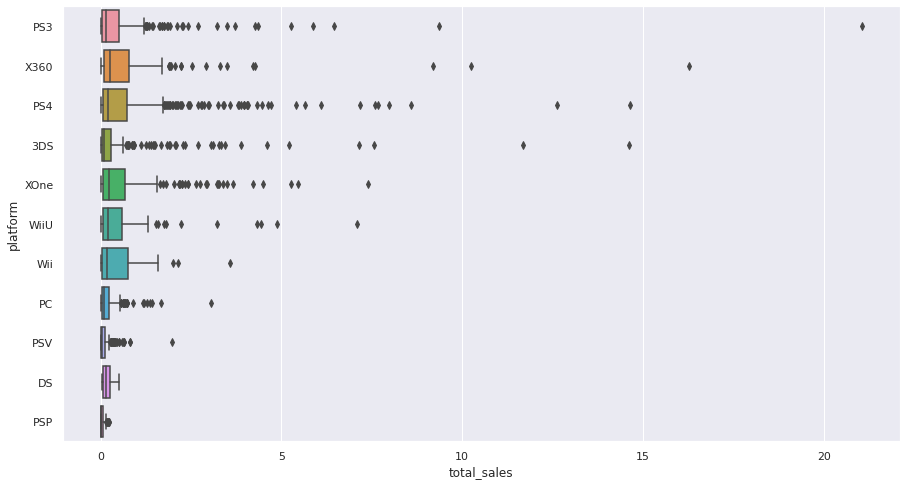

In [334]:
# построим график по всем годам, с учётом всех платформ
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=data, x="total_sales", y="platform");

Здесь сразу выделяются два гиганта - X360 и PS4. Их плотности распределения очень схожи, но Х360 чуть плотнее и смещён вправо, что говорит о чуть лучших продажах. При этом внушительно выглядит PS3, но он уже отходит в прошлое. Когда-то это была действительно большая и успешная платформа. Интересно сравнить WiiU с предшественником - Wii. У старой платформы было больше более продаваемых игр, но у WiiU длиннее хвост из выбросов (возможно, в будущем получится масштабировать этот потенциал). Интересно себя ведёт платформа 3DS - в основном там продаются слабые игры, но случаются и успешные кейсы - хвост из таких выбросов тянется аж до уровня PS4.

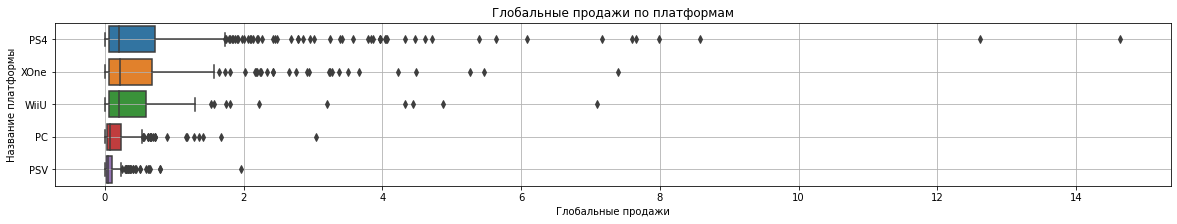

In [225]:
# построим график по лидирующим платформам
potent_profit_platforms = ['WiiU', 'PC', 'PSV', 'PS4', 'XOne']
data_potential = data.query('platform == @potent_profit_platforms')

plt.figure(figsize=(20, 3))
plt.title('Глобальные продажи по платформам')
sns.boxplot(x='total_sales', y='platform', data=data_potential)
plt.ylabel('Название платформы')
plt.xlabel('Глобальные продажи')
plt.grid(True);

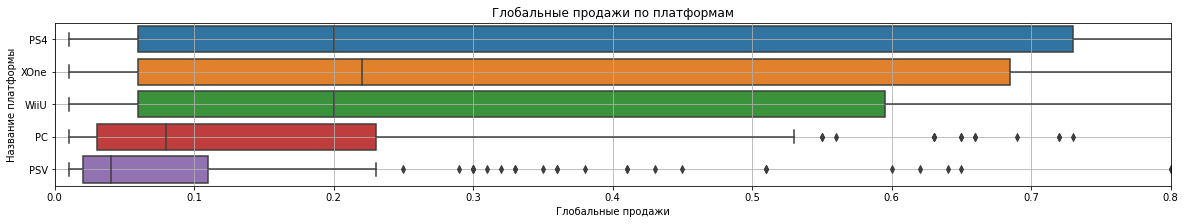

In [226]:
# приблизим график
potent_profit_platforms = ['WiiU', 'PC', 'PSV', 'PS4', 'XOne']
data_potential = data.query('platform == @potent_profit_platforms')

plt.figure(figsize=(20, 3))
plt.title('Глобальные продажи по платформам')
sns.boxplot(x='total_sales', y='platform', data=data_potential)
plt.ylabel('Название платформы')
plt.xlabel('Глобальные продажи')
plt.xlim(0, 0.8)

plt.grid(True);

**Выводы по графику:**

**Если оценивать глобальные продажи, то больше всего продаж на платформах PS4, XOne и WiiU. У PS4 больше максимальные значения продаж, больше наблюдаемый максимум, а выбросы вообще "уходят в космос" по некоторым позициям. При этом медианное значение продаж у него чуть меньше, чем у других двух лидеров - очевидно, видимо платформа удерживает позиции за счёт ассортимента. В тройке лидеров WiiU выглядит более скромно, но при этом нижний квартиль у него выше - случаев "провалившихся" игр у него меньше, но и суперуспешных кейсов тоже мало - складывается ощущение, что на платформе представлены устойчивые середнячки, которые точно продаются. Выбросы в положительную сторону у WiiU тоже есть, но реже, чем у PS4 и XOne. Тем не менее, платформа перспективная.** 

**Интересно сравнить PC и PSV: несмотря на то, что первый квартиль и медиана у них практически совпадают (25% и 50% продаж находится примерно на одном уровне), у PC есть хиты, которые продаются очевидно лучше, чем у PSV - об этом говорит и положение третьего квартиля, и выбросы.**

**Есть момент касаемо плотностей распределения всех платформ: она ассиметрична - везде медиана смещена влево. То есть добрая половина распределения глобальных продаж "размазана" от 0.05-0.2 и выше, у графика длинный нисходящий "хвост". То есть основной костяк игр показывают не очень большой уровень продаж по отдельности, но составляют основной пул продаж - это малопопулярные игры, которые делают прибыль своей массой, их просто много. При этом остальные игры совсем по-разному "заходят" аудитории - можно наткнуться на игру, которая делает феноменальные продажи, перекрывая остальные вместе взятые.**

**Подводя итог: самым уверенным и успешным на данный момент выглядит PS4, второе место занимает XOne, их стремится догнать WiiU, а PC может показать хорошую перспективу. Самые слабые позиции у PSV.**

#### Влияние оценок на продажи

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

##### Влияние любительских оценок

**PS4**

In [227]:
# возьмём для анализа игры с PS4, отсеим пользовательские заглушки
data_ps4_user = data.query('platform == "PS4" and user_score != -1 and user_score != 10000')
data_ps4_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int64  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.8+ KB


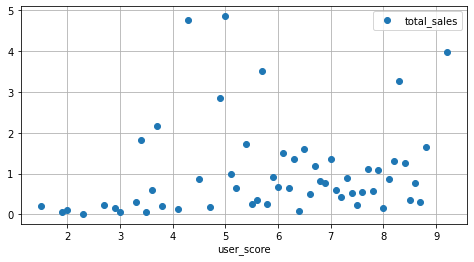

In [228]:
data_ps4_user.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(8, 4))
plt.show()

In [229]:
corr_user_sales = data_ps4_user['total_sales'].corr(data_ps4_user['user_score']).round(2)
corr_user_sales

-0.03

Корреляции практически нет, более того, она обратная (выше оценка - хуже продажи). Это выглядит подозрительно. Посмотрит отдельно влияние плохих и хороших оценок на продажи, опустив средние.

In [230]:
corr_user_sales = data_ps4_user.query('user_score < 3')['total_sales']\
    .corr(data_ps4_user.query('user_score < 3')['user_score']).round(2)
corr_user_sales

0.14

In [231]:
corr_user_sales = data_ps4_user.query('user_score > 7')['total_sales']\
    .corr(data_ps4_user.query('user_score > 7')['user_score']).round(2)
corr_user_sales

0.15

**Вывод: у очень плохих и очень хороших оценок есть небольшая корреляция с уровнем продаж. Они практически одинаково влияют на уровень продаж. Связь такая: чем выше оценка, тем больше продаж. При этом у средних оценок корреляции практически нет, они практически не влияют на уровень продаж.**

##### Влияние профессиональных оценок

In [232]:
# возьмём для анализа игры с PS4, отсеим заглушки в оценках критиков
data_ps4_critic= data.query('platform == "PS4" and critic_score != -1')
data_ps4_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int64  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.8+ KB


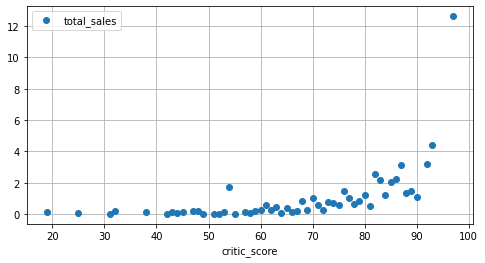

In [233]:
data_ps4_critic.pivot_table(index='critic_score', values='total_sales').plot(grid=True, style='o', figsize=(8, 4))
plt.show()

In [234]:
corr_critic_sales = data_ps4_critic['total_sales'].corr(data_ps4_critic['critic_score']).round(2)
corr_critic_sales

0.41

In [235]:
corr_critic_sales = data_ps4_user.query('critic_score < 30')['total_sales']\
    .corr(data_ps4_critic.query('critic_score < 30')['critic_score']).round(2)
corr_critic_sales

-1.0

In [236]:
corr_critic_sales = data_ps4_user.query('critic_score > 90')['total_sales']\
    .corr(data_ps4_critic.query('critic_score > 90')['critic_score']).round(2)
corr_critic_sales

0.97

**Вывод: в целом профессиональные оценки оказывают серьёзное влияние на уровень продаж. При этом у плохих оценок получилась обратная зависимость: чем выше оценка, тем меньше продаж — но таких игр в принципе мало. У высоких оценок практически полная прямая зависимость: чем выше оценка, тем больше продаж. Это может говорить о том, что люди неоднозначно относятся к оценкам критиков: берут как то, что тем понравилось, так и то, что профессионалы раскритиковали (вдруг там что-то стоящее и необычная). Может быть и технический момент: возможно где-то применяется обратный рейтинг (чем меньше число, тем лучше игра).**

##### Продажи на других платформах

**XOne**

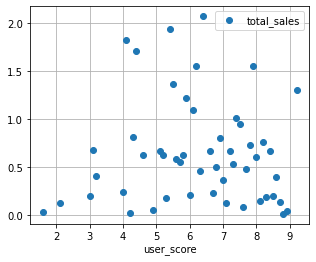

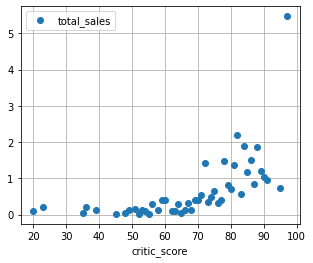

In [237]:
# возьмём для анализа игры с XOne, отсеим заглушки
data_xone = data.query('platform == "XOne" and user_score != -1 and user_score != 10000 and critic_score != -1')\
    [['user_score', 'critic_score', 'total_sales']]
data_xone.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()
data_xone.pivot_table(index='critic_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()

In [238]:
# посмотрим корреляцию продаж с оценками
data_xone.corr().round(2)

,user_score,critic_score,total_sales
user_score,1.00,0.47,-0.07
critic_score,0.47,1.00,0.42
total_sales,-0.07,0.42,1.00


Напомню, что у PS4 корреляция продаж с пользовательскими оценками -0.03, с профессиональными 0.41. У XOne ситуация похожая: едва ощутимая корреляция с пользовательскими оценками (-0.09) и абсолютно такая же (0.41) — с профессиональными оценками. 

Кстати, здесь мнение пользователей влияет чуточку сильнее. При этом по графикам видно, что до 4 баллов пользовательской оценки корреляция с продажами достаточно сильная, дальше она рассеивается. Причём максимальное число продаж у игр с оценками 4-8 баллов, т.н. крепкие середнячки. У экспертов же продажи резко возрастают при оценке выше 70, до этого связь практически отсутствует. Пользователи обращают внимание на игры, которые заслужили очень высокие оценками профессионалов и практически не обращают внимания на мнение других пользователей (не слишком ужасная игра, и то хорошо).

Можем предположить, что пользовательские оценки не берут во внимание из-за двух причин: накрученные отзывы и субъективность оценок.

Теперь посмотрим третьего гиганта — WiiU.

**WiiU**

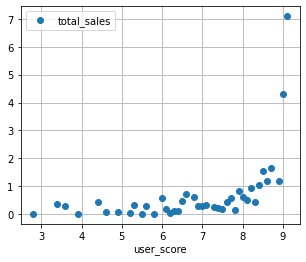

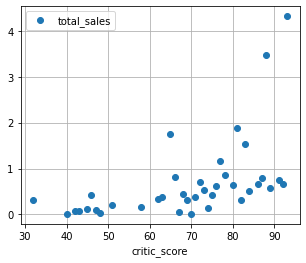

In [239]:
# берём WiiU, убираем заглушки
data_wiiu = data.query('platform == "WiiU" and user_score != -1 and user_score != 10000 and critic_score != -1')\
    [['user_score', 'critic_score', 'total_sales']]
data_wiiu.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()
data_wiiu.pivot_table(index='critic_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()

In [240]:
# посмотрим корреляцию продаж с оценками
data_wiiu.corr().round(2)

,user_score,critic_score,total_sales
user_score,1.00,0.72,0.42
critic_score,0.72,1.00,0.38
total_sales,0.42,0.38,1.00


А вот это уже интересно. Здесь оценки пользователей влияют так же сильно, как у XOne и PS4 влияют оценки экспертов. А оценки экспертов влияют чуточку хуже. 

Возможно это как-то связано с системой пользовательских оценок (например, отзывы проходят модерацию и фильтрацию, поэтому к ним больше доверия). Либо в целом платформа менее популярна среди экспертов, поэтому приходится ориентироваться на других пользователей.

Для сравнения теперь посмотрим меньших братьев, которые занимают гораздо более слабые позиции на рынке.

**PC**

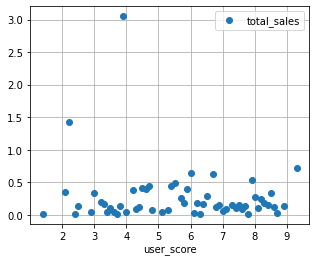

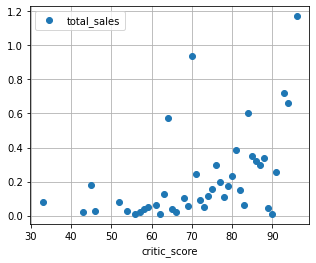

In [241]:
# берём PC, убираем заглушки
data_pc = data.query('platform == "PC" and user_score != -1 and user_score != 10000 and critic_score != -1')\
    [['user_score', 'critic_score', 'total_sales']]
data_pc.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()
data_pc.pivot_table(index='critic_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()

In [242]:
# посмотрим корреляцию продаж с оценками
data_pc.corr().round(2)

,user_score,critic_score,total_sales
user_score,1.00,0.43,-0.09
critic_score,0.43,1.00,0.20
total_sales,-0.09,0.20,1.00


Пользовательские оценки имеют ещё большую отрицательную корреляцию: по графику видно, что в топе продаж оказались игры с оценками 2-4 балла. Оценки критиков не имеют особой силы, корреляция всего 0.19, при этом по графику видно, что имеют относительное влияние оценки выше 60 баллов, игры с оценками 50-60 баллов почему-то почти не берут, а игр с оценками ниже 50 вообще сложно найти. 

Можем предположить, что из-за неоднозначности оценок экспертов (они практически не критикуют), большого доверия к ним нет, оценки имеют более условный характер, чем у больших игроков.

**PSV**

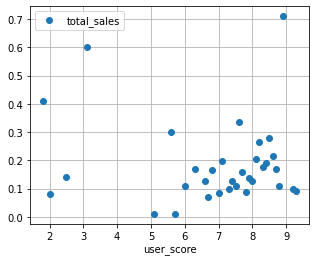

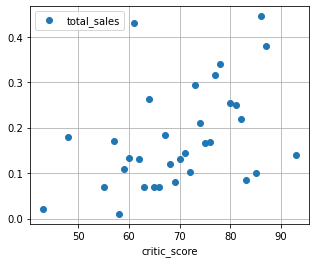

In [243]:
# берём PSV, убираем заглушки
data_psv = data.query('platform == "PSV" and user_score != -1 and user_score != 10000 and critic_score != -1')\
    [['user_score', 'critic_score', 'total_sales']]
data_psv.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()
data_psv.pivot_table(index='critic_score', values='total_sales').plot(grid=True, style='o', figsize=(5, 4))
plt.show()

In [244]:
# посмотрим корреляцию продаж с оценками
data_psv.corr().round(2)

,user_score,critic_score,total_sales
user_score,1.00,0.61,0.00
critic_score,0.61,1.00,0.25
total_sales,0.00,0.25,1.00


Ситуация напоминает WiiU, только корреляция чуточку слабее. Тут тоже в основном играют роль оценки пользователей, а эксперты занимают чуть более слабые позиции. По графику пользовательских оценок видно, что игры с оценками более 9 покупают плохо, возможно из-за заказных отзывов / редкости / слишком высокой цены. До 6.5 баллов связь практически прямая: чем выше оценка, тем больше продаж.

Что касается оценок критиков, то здесь мы снова видим пик продаж игр с оценками экспертов 60-90 баллов.

**Вывод:** 

**Если говорить об экспертных оценках, то они больше всего влияют на PS4, XOne, WiiU (средняя связь):**
* PS4 - по форме скорее напоминает параболу, при этом оценки до 30 скорее влияют обратным образом (плохая оценка - выше продажи), а у оценок выше 90 баллов прямая линейная связь с продажами 
* XOne - по форме напоминает параболу, при этом максимальное влияние набирают оценки выше 80 баллов
* WiiU - у оценок выше 70 баллов связь почти линейная
**У РС и PSV связь между экспертными оценками и уровнем продаж слабая:**
* РС - по форме напоминает параболу (оценки выше 70 баллов сильнее влияют на продажи)
* PSV - до 50 баллов связь практически прямая, дальше влияние экспертов размывается (пользователи одинаково хорошо берут игры с оценками 60-90 баллов, при этом игры с оценками выше 90 баллов берут значительно хуже)

**Что касается влияния пользовательских оценок — сильнее всего они влияют на XOne, WiiU (средняя связь):**
* XOne - лучше всего берут игры с оценками 4-8 баллов, выше 8 баллов связь напоминает линейную, но обратную (чем выше оценка, тем меньше продаж)
* WiiU - оценки выше 8 баллов показывают практически параболическую зависимость, а оценки ниже очень неоднородно влияют на объём продаж - связь нелинейная
**У PS4, PC, PSV связь между пользовательскими оценками и уровнем продаж слабая:**
* PS4 - связь нелинейная, при этом есть слабая линейная связь у плохих оценок (игры до 3 баллов практически не берут)
* РС - пиковые продажи тут приходятся даже на игры с оценками 2-4 балла, в целом оценки большой роли не играют
* PSV - игры с оценками выше 9 не набирают продаж, у игр с оценками ниже 6.5 практически прямая зависимость оценок с продажами

**Таким образом, на крупных платформах XOne и WiiU влияние пользовательских и экспертных оценок на уровень продаж сильнее, чем на менее популярных платформах. На PS4 больше смотрят на экспертов, на РС ориентируются только на высокие экспертные оценки, а на PSV учитывают очень плохие отзывы экспертов и пользователей. При этом в большинстве случаев максимум продаж получают игры, которые смогли заработать более 60 баллов у критиков (т.е. фактически получили рекомендации от лидеров мнений).**

##### Продажи по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

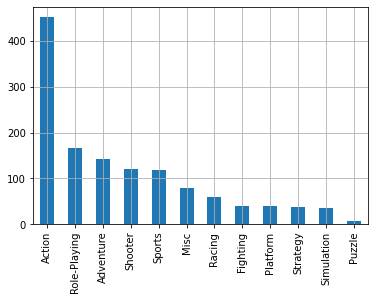

In [245]:
# посмотрим на распределение игр по жанрам
data_potential['genre'].value_counts().plot(kind='bar', grid=True);

Больше всего игр в жанре экшн (лидирует с колоссальным отрывом), также в тройке лидеров ролевые игры и приключения. Меньше всего пазлов, симуляторов, стратегий. Посмотрим, какие жанры лучше продаются.

По уровню продаж лидируют шутеры (также большой отрыв), затем спортивные игры и платформы.

In [246]:
data_potential.pivot_table(index='genre', values='total_sales').sort_values('total_sales', ascending=False).head(3)

,total_sales
genre,
Shooter,1.369008
Sports,0.746639
Platform,0.635750


In [247]:
data_potential.pivot_table(index='genre', values='total_sales').sort_values('total_sales', ascending=False).tail(3)

,total_sales
genre,
Strategy,0.201053
Puzzle,0.200000
Adventure,0.092606


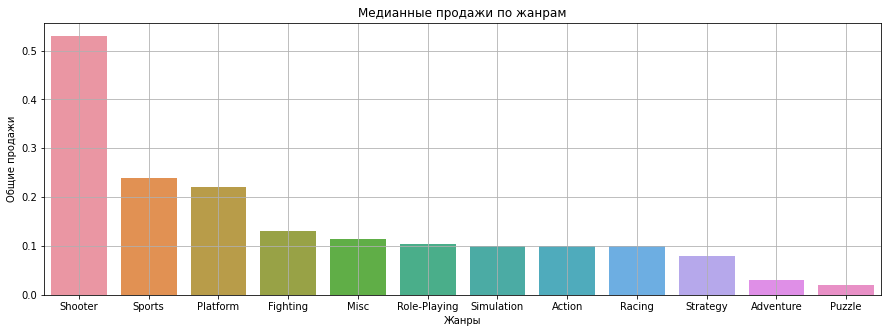

In [248]:
genres_sales = data_potential.pivot_table(index='genre', values='total_sales', aggfunc='median')\
    .sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(15, 5))
plt.title('Медианные продажи по жанрам')
sns.barplot(x='genre', y='total_sales', data=genres_sales)
plt.ylabel('Общие продажи')
plt.xlabel('Жанры')
plt.grid(True);

**Вывод: меньше всего продаж у паззлов, стратегий и приключений.
Удивительная картина у приключений (Adventure): они на 3-м месте по количеству игр и в хвосте по уровню продаж. Очевидно, что целесообразность создания таких игр не самая лучшая.
Лидируют по уровню продаж шутеры, спортивные игры и платформенные. По количеству игр они в серединке.**

### Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [249]:
# посмотрим топ-5 платформ в регионе NA (Северная Америка)
data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).reset_index().head()

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


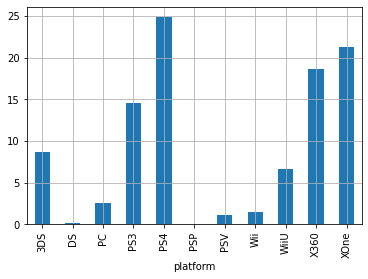

In [250]:
# построим график с долями продаж разных платформ по Северной Америке
(data.groupby('platform')['na_sales'].sum() / data['na_sales'].sum() * 100).round(2).plot(kind='bar', grid=True);

В Северной Америке лидируют платформы PS4, XOne и X360 (этой платформы не было в списке лидеров по всем рынкам — скорее всего, это локальное явление). WiiU там занимает слабые позиции, даже меньше, чем у PC.

In [251]:
# посмотрим топ-5 платформ в регионе EU (Европа)
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).reset_index().head()

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


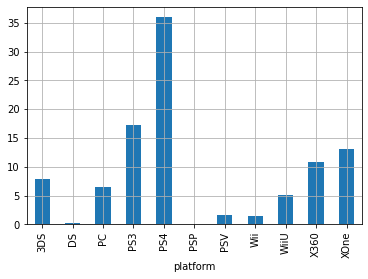

In [252]:
# построим график с долями продаж разных платформ по Европе
(data.groupby('platform')['eu_sales'].sum() / data['eu_sales'].sum() * 100).round(2).plot(kind='bar', grid=True);

В Европе лидирует PS4 с большим отрывом, на второй позиции — её "младший брат", PS3. Далее XOne и X360. В целом, картина напоминает Северную Америку с разницей в популярности PS3 — в Америке она на 3-м месте, а не на 2-м.

In [253]:
# посмотрим топ-5 платформ в регионе JP (Япония)
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).reset_index().head()

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


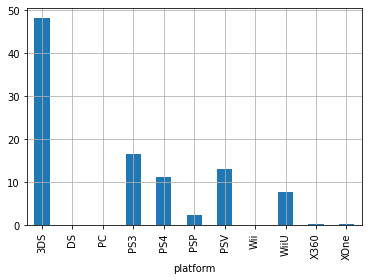

In [254]:
# построим график с долями продаж разных платформ по Японии
(data.groupby('platform')['jp_sales'].sum() / data['jp_sales'].sum() * 100).round(2).plot(kind='bar', grid=True);

В Японии 3DS — практически монополист на рынке. Далее PS3 (старая версия, которая на Западе уже угасает). В общем и целом здесь ассортимент платформ гораздо меньше.

Интересная ситуация с WiiU — по всем трём геолокациям она явно не в тройке лидеров, при этом по общим продажам оказалась в топе. Скорее всего, это из-за того, что в таблице нет статистики по Китаю, России и другим крупным рынкам.

**Вывод: в Северной Америке и Европе лидирует семейство PS — в Америке популярна более новая версия (PS4), а в Европе ещё PS3. При этом в Японии лидирует 3DS. Третьего гиганта по числу продаж — WiiU — на этих трёх рынках нет в тройке лидеров.**

#### Самые популярные жанры (топ-5). Поясните разницу.

In [255]:
# посмотрим топ-5 жанров в регионе NA (Северная Америка)
data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).reset_index().head()

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


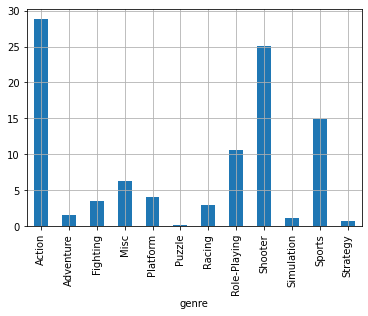

In [256]:
# построим график с долями продаж разных жанров по Северной Америке
(data.groupby('genre')['na_sales'].sum() / data['na_sales'].sum() * 100).round(2).plot(kind='bar', grid=True);

В Северной Америке предпочитают экшн и шутер. Значительно меньше: спортивные, ролевые игры и другие активные игры. Стратегии и паззлы людям не интересны совершенно.

In [257]:
# посмотрим топ-5 жанров в регионе EU (Европа)
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).reset_index().head()

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


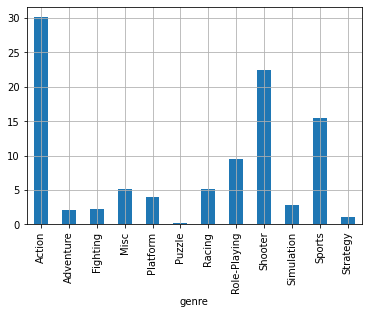

In [258]:
# построим график с долями продаж разных жанров по Европе
(data.groupby('genre')['eu_sales'].sum() / data['eu_sales'].sum() * 100).round(2).plot(kind='bar', grid=True);

В европейском топе жанров мы снова видим экшн и шутер. Далее — снова спортивные и ролевые игры, но появились гонки. В хвосте по-прежнему паззлы и стратегии.  

In [259]:
# посмотрим топ-5 жанров в регионе JP (Япония)
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).reset_index().head()

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


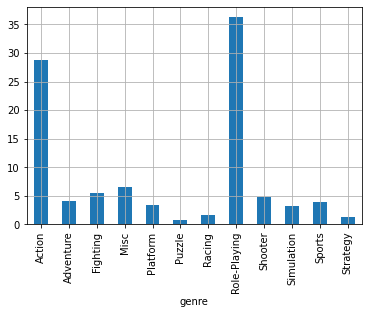

In [260]:
# построим график с долями продаж разных жанров по Японии
(data.groupby('genre')['jp_sales'].sum() / data['jp_sales'].sum() * 100).round(2).plot(kind='bar', grid=True);

В Японии ситуация отличается: здесь люди обожают ролевые игры, а затем уже экшн. Затем с колоссальным отрывом идут другие активные игры, рукопашные бои и шутеры. Одно совпадает — люди так же не любят паззлы и стратегии.

**Вывод: в Америке и Европе поведение пользователей во многом совпадает (с той лишь разницей, что европейцы любят гонки). При этом экшн популярен практически по всему миру. В Японии сказывается местный менталитет — тут любят ролевые игры и рукопашные бои.**

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала посмотрим, какие рейтинги у нас есть в базе данных и что они значат:

In [261]:
data['rating'].value_counts()

NR      977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

где:
* NR — это наша заглушка, игры без рейтинга (заполнили пропуски)
* М — игры для взрослых, 17+
* Т — игры для подростков, 13+
* Е — игры для всех
* Е10+ — игры для всех, 10+

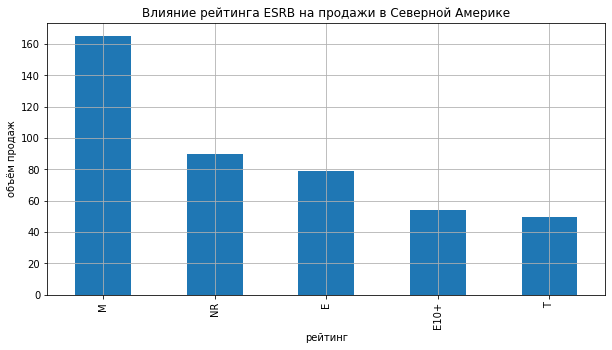

In [262]:
# построим график по Сев.Америке

rating_and_sales_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating_and_sales_na.plot(x='rating', y='na_sales', kind='bar', figsize=(10,5), grid=True\
                         , title = 'Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('рейтинг')
plt.ylabel('объём продаж')
plt.show()

В Северной Америке со значительным отрывом (разница почти в 2 раза) лидируют игры для взрослых (содержат жестокие или откровенные сцены). Далее идут игры без рейтинга и игры для всех. Меньше всего покупают игры для подростков — с рейтингом Т.

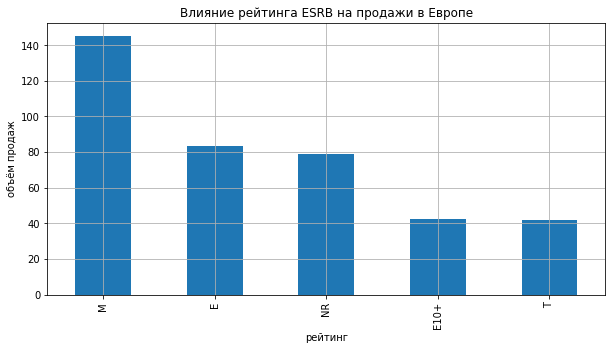

In [263]:
# построим график по Европе

rating_and_sales_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating_and_sales_eu.plot(x='rating', y='eu_sales', kind='bar', figsize=(10,5), grid=True\
                         , title = 'Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('рейтинг')
plt.ylabel('объём продаж')
plt.show()

В Европе так же популярны игры для взрослых, но отрыв чуть меньше, чем в Америке. Следом идут игры для всех и игры без рейтинга. В хвосте — игры для подростков и всех старше 10 лет.

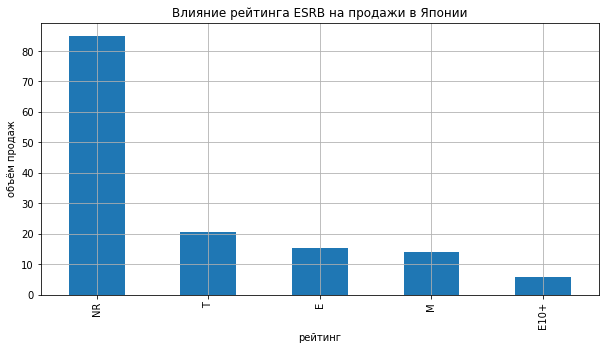

In [264]:
# построим график по Японии

rating_and_sales_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating_and_sales_jp.plot(x='rating', y='jp_sales', kind='bar', figsize=(10,5), grid=True\
                         , title = 'Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('рейтинг')
plt.ylabel('объём продаж')
plt.show()

Удивительная картина. С колоссальным отрывом идут игры без рейтинга, далее игры для подростков и для всех. И уже потом — игры для взрослых. В хвосте — игры для всех 10+. Это может говорить о том, что Североамериканский рейтинг ESRB просто не расценивает игры с местного японского рынка, и они остаются без рейтинга. Показательно, что взрослые игры там не имеют большой популярности. С одной стороны, особенности менталитета, с другой — вспоминаем топ жанров, где шутеры оказались аж на 5-м месте.

**Вывод: игра с рейтингом М практически наверняка добьётся успеха в Северной Америке и Европе. У игр с рейтингом Е есть тоже шансы на успех на этих рынках. А вот играм с рейтингом Е10+ не везёт по всем трём геолокациям. В то же время в Японии данный рейтинг не играет такой значительной роли — большинство продаж тут приходится на игры, у которых вообще нет данного рейтинга. Но игры для взрослых в Японии лучше не продавать — вместо этого лучше выбрать игры для подростков.**

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза Н0: средняя пользовательского рейтинга Xbox One равна средней пользовательского рейтинга PC.

Альтернативная гипотеза: средние не равны.

In [265]:
# посмотрим, как правильно называется Xbox One в нашей базе
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [266]:
# проверим гипотезу: что средние пользовательских оценок у двух платформ равны
user_score_xbox = data.query('platform == "XOne"')['user_score'].dropna()
user_score_pc = data.query('platform == "PC"')['user_score'].dropna()

alpha = .01

# совокупности не равны по размеру, поэтому указываем equal_var = False
# выборки независимые, поэтому используем метод ttest_ind
results = st.ttest_ind(user_score_xbox, user_score_pc, equal_var = False)

print ('p-значение', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод: средние пользовательские рейтинги на платформах Xbox One и PC статистически значимо не различаются. Это может говорить о том, что пользователи этих двух платформ оценивают игры схожим образом.**

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза Н0: средние пользовательские оценки у двух жанров равны.

Альтернативная гипотеза Н1: средние пользовательские оценки у двух жанров различаются.

Мы ставим нашу задачу в альтернативную гипотезу, поскольку методика подразумевает именно равенство средних двух генеральных совокупностей. Если нулевая гипотеза подтвердится, значит, средние будут НЕ разными, если нулевая гипотеза будет опровергнута — значит, средние будут скорее разными.

In [267]:
data['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [268]:
# проверим гипотезу: что средние пользовательских оценок у двух жанров разные
user_score_action = data.query('genre == "Action"')['user_score'].dropna()
user_score_sports = data.query('genre == "Sports"')['user_score'].dropna()

alpha = .01

# совокупности не равны по размеру, поэтому указываем equal_var = False
# выборки независимые, поэтому используем метод ttest_ind
results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)

print ('p-значение', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод: средние пользовательские рейтинги жанров спорт и экшн статистически значимо различаются. Скорее всего, пользователи по-разному оценивают игры в этих двух жанрах. Поэтому вывод о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, скорее похож на правду.**

### Общий вывод

В ходе данной работы мы получили базу данных с продажами игр по всему миру на разных платформах.

Мы изменили тип данных по мере необходимости, перевели год в формат даты. Убрали пропуски и дубли. Использовали заглушки в рейтинге, чтобы не терять важные данные и заменили отсутствующие оценки на NaN. Добавили столбец суммарных продаж по всем регионам.

Затем мы провели исследовательский анализ данных:

- выяснили, что до 1994 года игр было очень мало, пик выхода игр пришёлся на 2007-2008 годы, а с 2012 года в индустрии происходит кризис

- узнали, что крупнейшеми платформами по объёму продаж за все годы и по всем регионам являются PS2, X360 и PS3

- посмотрели на графике, как приходят и уходят платформы, при этом средний срок жизни одной платформы составляет 10-12 лет, а на пике она находится 2-5 лет максимум

- узнали, что в 2016 на рынке лидировали PS4, XOne и WiiU, потенциально прибыльными были PC и PSV

- оценили влияние оценок пользователей на уровень продаж и выяснили, что на крупных платформах XOne и WiiU влияние пользовательских и экспертных оценок на уровень продаж сильнее, чем на менее популярных платформах. На PS4 больше смотрят на экспертов, на РС ориентируются только на высокие экспертные оценки, а на PSV учитывают очень плохие отзывы экспертов и пользователей. При этом в большинстве случаев максимум продаж получают игры, которые смогли заработать более 60 баллов у критиков (т.е. фактически получили рекомендации от лидеров мнений).

- посмотрели продажи по жанрам и увидели, что больше всего выходит игр в жанре экшн, ролевых и приключений, при этом медианные продажи выше у шутеров, спортивных игр и платформенных

- изучили пользователей с разных регионов и увидели, что в Северной Америке и Европе лидирует платформа PS — в Америке популярна более новая версия (PS4), а в Европе ещё PS3. При этом в Японии лидирует 3DS. Третьего гиганта по числу продаж — WiiU — на этих трёх рынках нет в тройке лидеров

- изучили жанровые предпочтения по регионам и заметили, что в Америке и Европе поведение пользователей во многом совпадает (с той лишь разницей, что европейцы любят гонки). При этом экшн популярен практически по всему миру. В Японии сказывается местный менталитет — тут любят ролевые игры и рукопашные бои

- посмотрели влияние рейтинга на продажи и узнали, что игра с рейтингом М практически наверняка добьётся успеха в Северной Америке и Европе. У игр с рейтингом Е есть тоже шансы на успех на этих рынках. А вот играм с рейтингом Е10+ не везёт по всем трём геолокациям. В то же время в Японии данный рейтинг не играет такой значительной роли — большинство продаж тут приходится на игры, у которых вообще нет данного рейтинга. Но игры для взрослых в Японии лучше не продавать — вместо этого лучше выбрать игры для подростков

- проверили две гипотезы и высчитали, что пользовательские оценки на платформах Xbox One и PC статистически не различаются, а вот между пользовательскими оценками жанров экшн и спорт есть статистические различия

Рекомендации магазину игр на основе анализа:

1. Предлагать платформы PS4, XOne, WiiU, а также PC и PSV (с заделом на будущее)
2. Расширять ассортимент игр в жанрах экшн, спортивные, платформенные. Если нужен рынок Северной Америки и/или Европы, то лучше выбрать экшн и шутер, если Япония — ролевые игры и экшн. У гонок больше потенциал в Европе, а рукопашные бои вероятнее придутся по нраву в Японии
3. Тщательно выбирать категорию (рейтинг) игры. Игры для взрослых (М) практически обречены на успех в Северной Америке и Европе, но вряд ли понравятся в Японии. Если у игры совсем нет рейтинга, лучше попробовать продвижение на рынке Японии — там таких продаж большинство
4. Следить за оценками пользователей и критиков. Если игра получила высокую экспертную оценку (60+ баллов), то вероятность успеха выше. Стоит смотреть и на оценки пользователей: крайние оценки (очень высокие или очень низкие) работают на продажи лучше, чем средние. Особенно внимательно нужно быть с пользовательскими и экспертными оценками на платформах XOne и WiiU.
5. Учитывать влияние кризиса 2012 года и общее падение рынка.

In [269]:
# служебная команда — сохранение истории на случай потери данных
%history -g -f filename.txt

File 'filename.txt' exists. Overwrite? yes
Overwriting file.
